# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10


Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

In [5]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


In [6]:
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


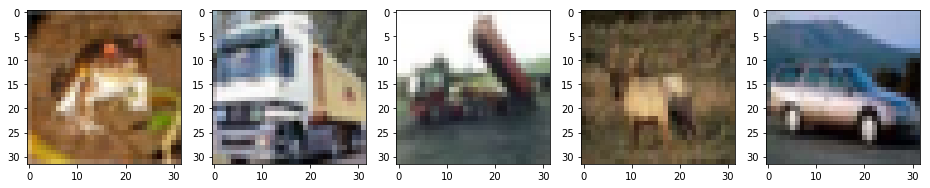

In [7]:
# Print figure with 10 random images from each
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([class_name[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [8]:
train_y_0_4 = np.where(y_train <= 4)
X_train_1= X_train[train_y_0_4[0]]
X_train_1.shape

(25000, 32, 32, 3)

In [9]:
test_y_0_4 = np.where(y_test <= 4)
X_test_1= X_test[test_y_0_4[0]]
X_test_1.shape

(5000, 32, 32, 3)

In [10]:
train_y_5_9 = np.where(y_train >= 5)
X_train_2= X_train[train_y_5_9[0]]
X_train_2.shape

(25000, 32, 32, 3)

In [11]:
test_y_5_9 = np.where(y_test >= 5)
X_test_2= X_test[test_y_5_9[0]]
X_test_2.shape

(5000, 32, 32, 3)

In [12]:
y_train_1 = y_train[train_y_0_4]
y_test_1= y_test[test_y_0_4]
print(y_train_1.shape)
print(y_test_1.shape)

(25000,)
(5000,)


In [13]:
y_train_2 = y_train[train_y_5_9]
y_test_2= y_test[test_y_5_9]
print(y_train_2.shape)
print(y_test_2.shape)

(25000,)
(5000,)


### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [14]:
# Transform label indices to one-hot encoded vectors

y_train1 = tf.keras.utils.to_categorical(y_train_1)
y_test1 = tf.keras.utils.to_categorical(y_test_1)


# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train_1 = X_train_1.astype('float32')
X_test_1 = X_test_1.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train1= X_train_1/ 255
X_test1= X_test_1/ 255

In [36]:
# Transform label indices to one-hot encoded vectors

y_train2 = tf.keras.utils.to_categorical(y_train_2)
y_test2 = tf.keras.utils.to_categorical(y_test_2)


# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train_2 = X_train_2.astype('float32')
X_test_2 = X_test_2.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train2 = X_train_2/ 255
X_test2 = X_test_2/ 255

In [40]:
Y_train2 = y_train2[:,5:10] # slicing the data to get required shape
Y_train2.shape

(25000, 5)

In [41]:
Y_test2 = y_test2[:,5:10] # slicing the data to get required shape
Y_test2.shape

(5000, 5)

In [37]:
print(y_train1.shape)

(25000, 5)


### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [18]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [19]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)       

In [20]:
# Fit the model
model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=epochs, batch_size=32)

Train on 25000 samples, validate on 5000 samples
Epoch 1/25
25000/25000 [==============================] - 149s 6ms/step - loss: 1.3702 - accuracy: 0.4048 - val_loss: 1.1575 - val_accuracy: 0.5214
Epoch 2/25
25000/25000 [==============================] - 150s 6ms/step - loss: 1.0170 - accuracy: 0.5830 - val_loss: 0.9278 - val_accuracy: 0.6250
Epoch 3/25
25000/25000 [==============================] - 151s 6ms/step - loss: 0.8820 - accuracy: 0.6508 - val_loss: 0.7957 - val_accuracy: 0.6856
Epoch 4/25
25000/25000 [==============================] - 151s 6ms/step - loss: 0.7880 - accuracy: 0.6936 - val_loss: 0.7056 - val_accuracy: 0.7230
Epoch 5/25
25000/25000 [==============================] - 151s 6ms/step - loss: 0.7241 - accuracy: 0.7191 - val_loss: 0.7078 - val_accuracy: 0.7282
Epoch 6/25
25000/25000 [==============================] - 151s 6ms/step - loss: 0.6756 - accuracy: 0.7378 - val_loss: 0.6525 - val_accuracy: 0.7496
Epoch 7/25
25000/25000 [==============================] - 152s 

In [21]:
model.save_weights('weight.hdf5') # to save weights of our model 

In [22]:
model.save('model.hdf5') # to save our model 

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [24]:
# Loading the model 
model2 =  load_model('model.hdf5')

In [31]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model2.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model2.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv2d_1
False
dropout_1
False
conv2d_2
False
max_pooling2d_1
False
conv2d_3
False
dropout_2
False
conv2d_4
False
max_pooling2d_2
False
conv2d_5
False
dropout_3
False
conv2d_6
False
max_pooling2d_3
False
flatten_1
False
dropout_4
False
dense_1
True
dropout_5
False
dense_2
True
dropout_6
False
dense_3
True


In [32]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)       

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [33]:
mckpt = tf.keras.callbacks.ModelCheckpoint('./cifar_5_9.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [43]:
history_2 = model2.fit(X_train2, Y_train2, validation_data=(X_test2, Y_test2),epochs=25,
          batch_size=32, callbacks=[mckpt],workers=4)

Train on 25000 samples, validate on 5000 samples
Epoch 1/25
25000/25000 [==============================] - 74s 3ms/sample - loss: 0.4705 - accuracy: 0.8264 - val_loss: 0.4220 - val_accuracy: 0.8500
Epoch 2/25
25000/25000 [==============================] - 74s 3ms/sample - loss: 0.4158 - accuracy: 0.8466 - val_loss: 0.4250 - val_accuracy: 0.8448
Epoch 3/25
25000/25000 [==============================] - 74s 3ms/sample - loss: 0.3683 - accuracy: 0.8651 - val_loss: 0.4369 - val_accuracy: 0.8460
Epoch 4/25
25000/25000 [==============================] - 75s 3ms/sample - loss: 0.3344 - accuracy: 0.8762 - val_loss: 0.4059 - val_accuracy: 0.8656
Epoch 5/25
25000/25000 [==============================] - 74s 3ms/sample - loss: 0.3052 - accuracy: 0.8851 - val_loss: 0.4288 - val_accuracy: 0.8560
Epoch 6/25
25000/25000 [==============================] - 75s 3ms/sample - loss: 0.2824 - accuracy: 0.8947 - val_loss: 0.4217 - val_accuracy: 0.8640
Epoch 7/25
25000/25000 [==============================] -

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [44]:
from sklearn.datasets import fetch_20newsgroups

In [45]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [47]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [67]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [68]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [69]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [70]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [71]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [77]:
y_train = twenty_train.target
y_test = twenty_test.target

In [78]:
vect = TfidfVectorizer()
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm_train = vect.fit_transform(twenty_train.data)
dtm_test = vect.transform(twenty_test.data)
features = vect.get_feature_names()
print (dtm_train.shape)
print (dtm_test.shape)

(2257, 35482)
(1502, 35482)


### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [80]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(dtm_train, y_train# Classification report  
print(metrics.classification_report(y_tst, y_pred_class)))
y_pred_class = logreg.predict(dtm_test)
print('test Accuracy ',metrics.accuracy_score(y_test, y_pred_class))
y_pred_class_train = logreg.predict(dtm_train)
print('train accuracy ',metrics.accuracy_score(y_train, y_pred_class_train))


test Accuracy  0.9280958721704394
train accuracy  1.0


In [81]:
# Classification report  
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       319
           1       0.91      0.98      0.94       389
           2       0.95      0.92      0.94       396
           3       0.91      0.96      0.93       398

   micro avg       0.93      0.93      0.93      1502
   macro avg       0.93      0.92      0.93      1502
weighted avg       0.93      0.93      0.93      1502

